Homework 02


In [161]:
import numpy as np


In [162]:
def sigmoid(drive): 
    return 1/(1+np.exp(-drive)) #sigmoid

def sigmoidprime(drive): 
    return sigmoid(drive)*(1-sigmoid(drive))


In [163]:
def data():

    examples = np.array([[1,0],
                        [0,1], 
                        [1,1], 
                        [0,0]])
    
    
    targets = np.sum(examples, axis = 1) == 1
    

    return examples, targets.astype(int)

In [164]:
class Perceptron_neu:

    def __init__(self, dim_in: int, alpha = 1):

        """One perceptron with all its properties

        Attributes:
                dim_in(int): number of weights
        """

        self.weights_and_bias = np.random.randn(dim_in + 1) #weights and bias, np.array
        self.alpha = alpha #learning rate
        self.drive = None #drive: needed for backpropagation later o'(d)
        self.inputs = None #neuron output


    def activate(self, inputs) -> float:
        """Computes neuron activation: w * input and returns output

        Attributes:
            inputs(nparray):
            layers (list): List of perceptron layers in the network.
        """

        self.inputs = np.append(inputs,1)
        self.drive = np.dot(self.weights_and_bias, self.inputs)
        return sigmoid(self.drive)


    def update(self, delta):
        """Computes weight update for all weights of the neuron"""
        gradient = delta * self.inputs
        self.weights_and_bias -= self.alpha * gradient



class one_layer:
    """One layer object should hold all Perceptrons of this layer"""
    
    
    def __init__(self, dim_in, dim_out):
        """
        Attributes:
            dim_in: how many neurons in previous layer
            dim_out: determines number of neurons in the layer
        """

        self.neurons = [Perceptron_neu(dim_in) for _ in range(dim_out)]

    
    def activate(self,inputs) ->np.ndarray:
        """Gives activation for each neuron in the layer
        Attributes: 
            inputs: needed to compute neuron activation
        returns: 
            Numpy array of activations. 
            These are the next layer inputs: numpy array
           
        """
        return np.array([per.activate(inputs) for per in self.neurons])






class MLP_neu:
    """Holds all perceptron layers. Main class to control whole network activation.

    Attributes:
        layers(list): allows to initialize the desired number of layers in the network

    """

    def __init__(self, *layers):
        """
        self.layers(list) = holds all layers
        self.layer_output = returns overall network output / prediction
        """

        self.layers = layers
        self.layer_output = None


    def forward_step(self, inputs)->list:
        """propagate the input through the network. The input of one layer is the activation of the layer before.

        self.layer_output = list with all activations

        """

        for l in self.layers:

            inputs = l.activate(inputs)

        self.layer_output = inputs

        return self.layer_output




    def backprop_step(self, inputs, target) ->None:
        """Performs backpropagation step and updates the weights"""

        delta = None
        old_weights = None

        # Iterates through all layers
        for N,l in enumerate(reversed(self.layers)):

            #iterates through perceptrons of the respective layer
            for per in l.neurons:
                #If we are in output layer
                if N==0:
                    delta = -(target - self.layer_output) * sigmoidprime(per.drive)
                    old_weights = per.weights_and_bias
                    per.update(delta)


                else:

                    delta = np.sum(delta * old_weights) * sigmoidprime(per.drive)
                    per.update(delta)





# Training
# Fit the model


epochs = 1000
MLP = MLP_neu(one_layer(2,4), one_layer(4,1))


examples, targets = data()
predictions = []
accuracies = []


for epoch in range(epochs):
    for example, target in zip(examples,targets):
        prediction = MLP.forward_step(example) # gives network output

        predictions.append(int(int(prediction > .5)==target))

        MLP.backprop_step(example, target)


    accuracies.append(sum(predictions[-4:])/4) #calculate accuracy




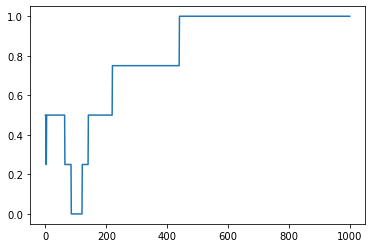

In [165]:
import matplotlib.pyplot as plt
#
plt.plot(accuracies)
plt.show()